Import necessary sqlite library, creating connection and cursor

In [47]:
import sqlite3
import pandas as pd

connexion = sqlite3.connect("../data/vivino.db")
cursor = connexion.cursor()

Making queries


In [48]:
query1 = """
SELECT
    vintages.wine_id,
    vintages.name,
    keywords.name,
    keywords_wine.count,
    keywords_wine.group_name
FROM
    vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN keywords_wine ON wines.id = keywords_wine.wine_id
    JOIN keywords ON keywords_wine.keyword_id = keywords.id
WHERE keywords.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus') 
    AND keywords_wine.count >= 10
GROUP BY vintages.name
ORDER BY keywords_wine.count DESC
"""

keywords = cursor.execute(query1)

pd_keywords = pd.DataFrame(keywords)
pd_keywords.columns =['wine_id', 'vintages_name', 'keyword', 'keyword_count', 'keyword_group']
display(pd_keywords)
    

,wine_id,vintages_name,keyword,keyword_count,keyword_group
0,86684,Dom Pérignon Brut Champagne 2013,toast,2165,non_oak
1,86684,Dom Pérignon Brut Champagne 2012,toast,2165,non_oak
2,86684,Dom Pérignon Brut Champagne 2006,toast,2165,non_oak
3,86684,Dom Pérignon Brut Champagne 2004,toast,2165,non_oak
4,86684,Dom Pérignon Brut Champagne 2000,toast,2165,non_oak
...,...,...,...,...,...
1200,1213,Avignonesi Vin Santo di Montepulciano 1991,coffee,10,non_oak
1201,1213,Avignonesi Vin Santo di Montepulciano 1989,coffee,10,non_oak
1202,1213,Avignonesi Vin Santo di Montepulciano 1988,coffee,10,non_oak
1203,1213,Avignonesi Vin Santo di Montepulciano 1987,coffee,10,non_oak


Making plots

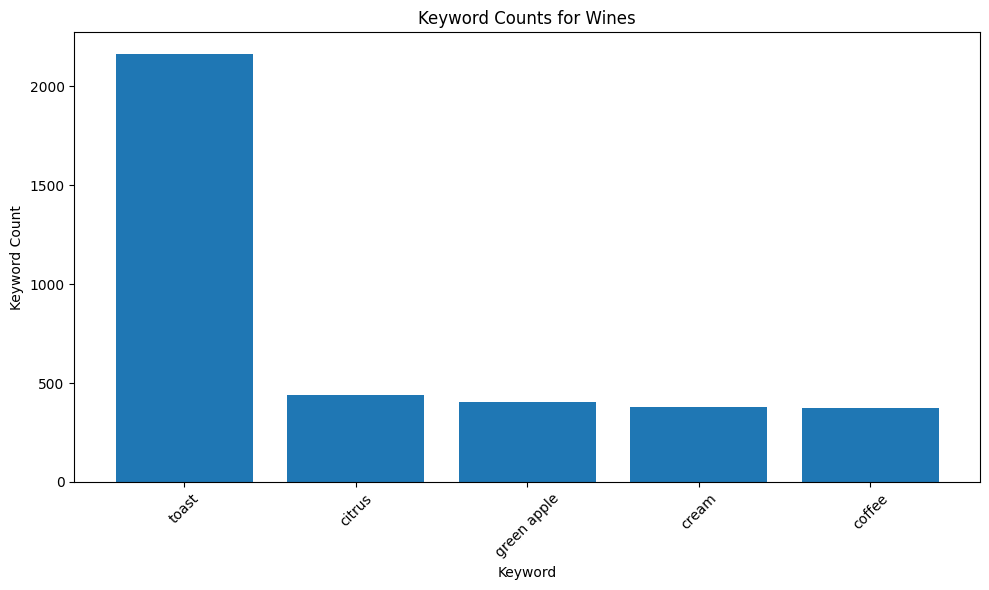

In [49]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(pd_keywords['keyword'], pd_keywords['keyword_count'])
plt.xlabel('Keyword')
plt.ylabel('Keyword Count')
plt.title('Keyword Counts for Wines')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the histogram
plt.show()


Histogram for toast

,wine_id,vintages_name,keyword,keyword_count,keyword_group
0,86684,Dom Pérignon Brut Champagne 2013,toast,2165,non_oak
1,86684,Dom Pérignon Brut Champagne 2012,toast,2165,non_oak
2,86684,Dom Pérignon Brut Champagne 2006,toast,2165,non_oak
3,86684,Dom Pérignon Brut Champagne 2004,toast,2165,non_oak
4,86684,Dom Pérignon Brut Champagne 2000,toast,2165,non_oak
...,...,...,...,...,...
1158,9577421,Paul Launois Single Barrel Champagne Grand Cru...,toast,10,non_oak
1193,75978,Casa Ferreirinha Quinta da Leda Douro 2019,toast,10,non_oak
1194,98838,Bodega Contador (Benjamín Romeo) Contador Rioj...,toast,10,non_oak
1195,98838,Bodega Contador (Benjamín Romeo) Contador Rioj...,toast,10,non_oak


,wine_id,vintages_name,keyword,keyword_count,keyword_group
0,86684,Dom Pérignon Brut Champagne 2013,toast,2165,non_oak
1,86684,Dom Pérignon Brut Champagne 2012,toast,2165,non_oak
2,86684,Dom Pérignon Brut Champagne 2006,toast,2165,non_oak
3,86684,Dom Pérignon Brut Champagne 2004,toast,2165,non_oak
4,86684,Dom Pérignon Brut Champagne 2000,toast,2165,non_oak


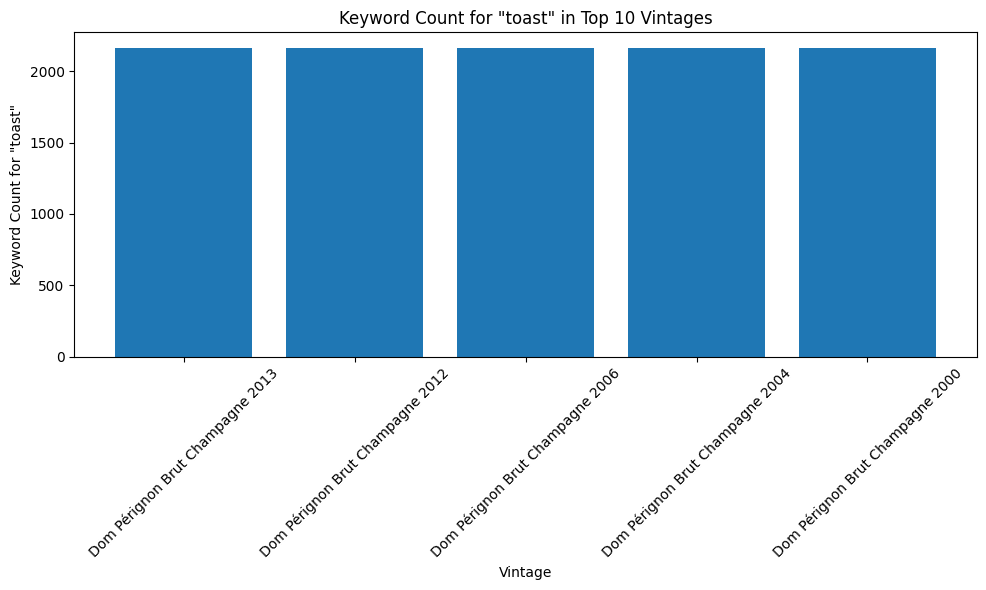

In [50]:
toast = pd_keywords[pd_keywords['keyword'] == 'toast']
display(toast)

toast_top_5 = toast.nlargest(5, 'keyword_count')
display(toast_top_5)

plt.figure(figsize=(10, 6))
plt.bar(toast_top_5['vintages_name'].tolist(), toast_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "toast"')
plt.title('Keyword Count for "toast" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

Bar plot citrus

,wine_id,vintages_name,keyword,keyword_count,keyword_group
17,1211816,Billecart-Salmon Brut Rosé Champagne,citrus,441,citrus_fruit
56,1127349,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,citrus,240,citrus_fruit
57,1127349,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,citrus,240,citrus_fruit
58,1127349,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,citrus,240,citrus_fruit
77,1257923,Didier Dagueneau (Louis-Benjamin Dagueneau) Si...,citrus,185,citrus_fruit
...,...,...,...,...,...
1004,1435787,Jean-Claude Ramonet Montrachet Grand Cru 1987,citrus,13,citrus_fruit
1093,1949999,Domaine du Pavillon Corton-Charlemagne Grand C...,citrus,12,citrus_fruit
1094,1949999,Domaine du Pavillon Corton-Charlemagne Grand C...,citrus,12,citrus_fruit
1136,87554,Château Rayas Châteauneuf-du-Pape Réservé Blan...,citrus,11,citrus_fruit


,wine_id,vintages_name,keyword,keyword_count,keyword_group
17,1211816,Billecart-Salmon Brut Rosé Champagne,citrus,441,citrus_fruit
56,1127349,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,citrus,240,citrus_fruit
57,1127349,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,citrus,240,citrus_fruit
58,1127349,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,citrus,240,citrus_fruit
77,1257923,Didier Dagueneau (Louis-Benjamin Dagueneau) Si...,citrus,185,citrus_fruit


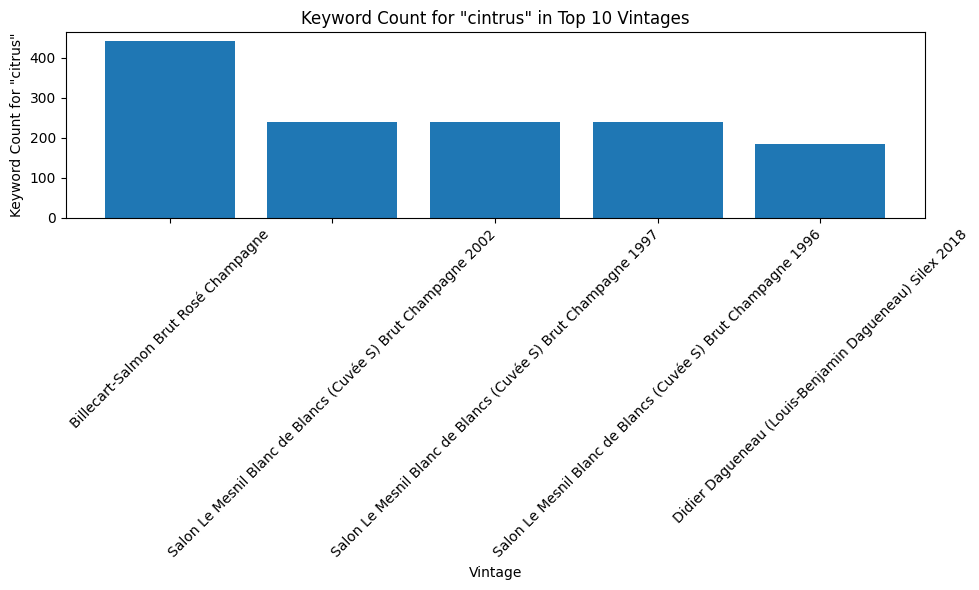

In [51]:
citrus = pd_keywords[pd_keywords['keyword'] == 'citrus']
display(citrus)

citrus_top_5 = citrus.nlargest(5, 'keyword_count')
display(citrus_top_5)

plt.figure(figsize=(10, 6))
plt.bar(citrus_top_5['vintages_name'].tolist(), citrus_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "citrus"')
plt.title('Keyword Count for "cintrus" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

Bar plot coffee

,wine_id,vintages_name,keyword,keyword_count,keyword_group
20,21929,Masi Costasera Amarone della Valpolicella Clas...,coffee,372,oak
21,21929,Masi Costasera Amarone della Valpolicella Clas...,coffee,372,oak
25,1684223,Château Mouton Rothschild Pauillac (Premier Gr...,coffee,318,oak
26,1684223,Château Mouton Rothschild Pauillac (Premier Gr...,coffee,318,oak
27,1684223,Château Mouton Rothschild Pauillac (Premier Gr...,coffee,318,oak
...,...,...,...,...,...
1200,1213,Avignonesi Vin Santo di Montepulciano 1991,coffee,10,non_oak
1201,1213,Avignonesi Vin Santo di Montepulciano 1989,coffee,10,non_oak
1202,1213,Avignonesi Vin Santo di Montepulciano 1988,coffee,10,non_oak
1203,1213,Avignonesi Vin Santo di Montepulciano 1987,coffee,10,non_oak


,wine_id,vintages_name,keyword,keyword_count,keyword_group
20,21929,Masi Costasera Amarone della Valpolicella Clas...,coffee,372,oak
21,21929,Masi Costasera Amarone della Valpolicella Clas...,coffee,372,oak
25,1684223,Château Mouton Rothschild Pauillac (Premier Gr...,coffee,318,oak
26,1684223,Château Mouton Rothschild Pauillac (Premier Gr...,coffee,318,oak
27,1684223,Château Mouton Rothschild Pauillac (Premier Gr...,coffee,318,oak


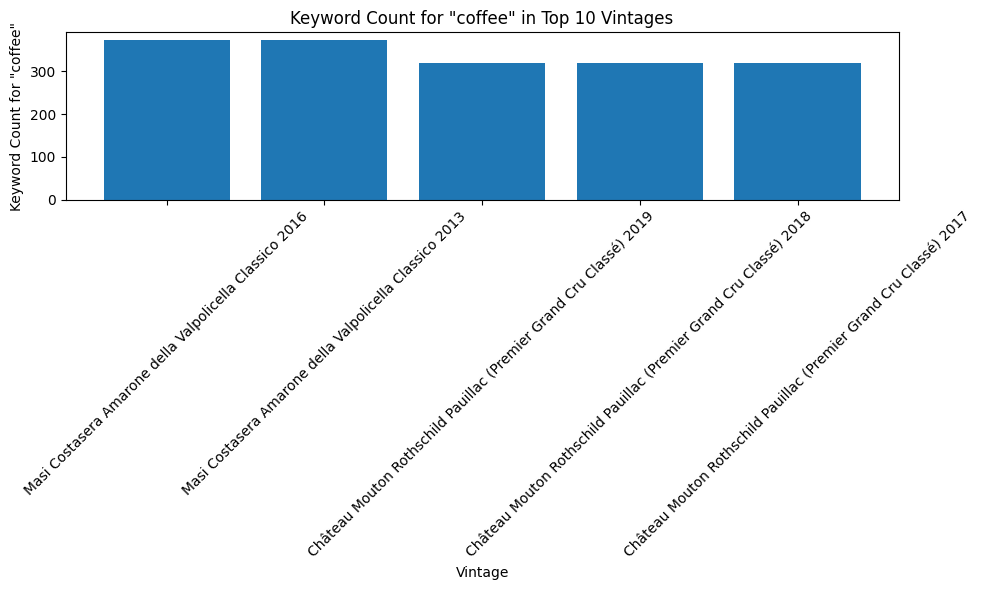

In [52]:
coffee = pd_keywords[pd_keywords['keyword'] == 'coffee']
display(coffee)

coffee_top_5 = coffee.nlargest(5, 'keyword_count')
display(coffee_top_5)

plt.figure(figsize=(10, 6))
plt.bar(coffee_top_5['vintages_name'].tolist(), coffee_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "coffee"')
plt.title('Keyword Count for "coffee" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

Bar plot Green apple

,wine_id,vintages_name,keyword,keyword_count,keyword_group
18,1697,Chateau Montelena Chardonnay 2019,green apple,406,tree_fruit
66,79162,Perrier-Jouët Belle Epoque Brut Champagne 2014,green apple,224,tree_fruit
67,79162,Perrier-Jouët Belle Epoque Brut Champagne 2013,green apple,224,tree_fruit
411,74300,Louis Roederer Blanc de Blancs Brut Champagne ...,green apple,62,tree_fruit
520,2052637,Kosta Browne One Sixteen Chardonnay 2019,green apple,43,tree_fruit
592,1182677,Trimbach Clos Sainte Hune Riesling Alsace 2016,green apple,36,tree_fruit
593,1182677,Trimbach Clos Sainte Hune Riesling Alsace 2014,green apple,36,tree_fruit
594,1182677,Trimbach Clos Sainte Hune Riesling Alsace 2012,green apple,36,tree_fruit
595,1182677,Trimbach Clos Sainte Hune Riesling Alsace 2005,green apple,36,tree_fruit
598,86685,Egon Müller - Scharzhof Scharzhofberger Riesli...,green apple,36,tree_fruit


,wine_id,vintages_name,keyword,keyword_count,keyword_group
18,1697,Chateau Montelena Chardonnay 2019,green apple,406,tree_fruit
66,79162,Perrier-Jouët Belle Epoque Brut Champagne 2014,green apple,224,tree_fruit
67,79162,Perrier-Jouët Belle Epoque Brut Champagne 2013,green apple,224,tree_fruit
411,74300,Louis Roederer Blanc de Blancs Brut Champagne ...,green apple,62,tree_fruit
520,2052637,Kosta Browne One Sixteen Chardonnay 2019,green apple,43,tree_fruit


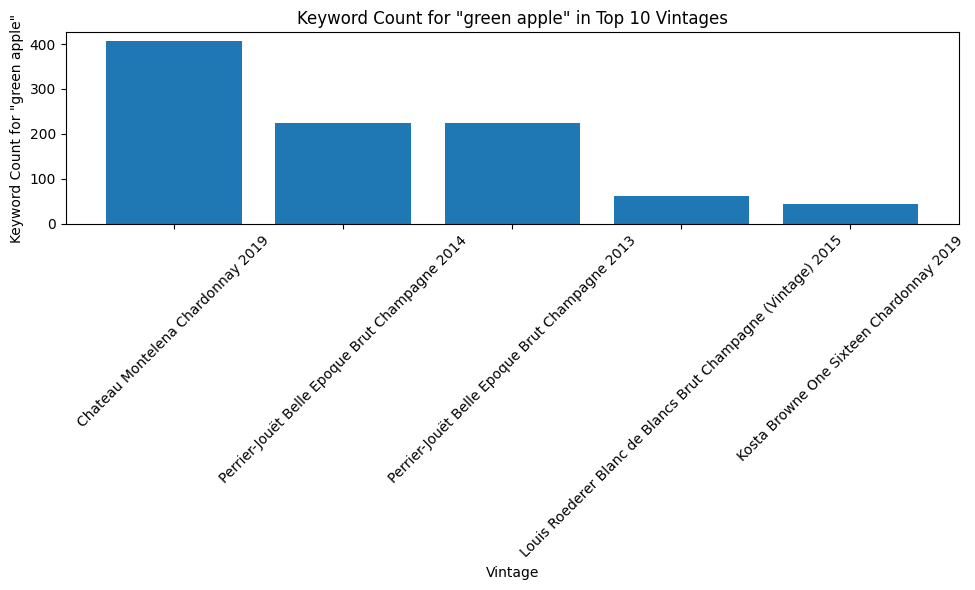

In [53]:
green_apple = pd_keywords[pd_keywords['keyword'] == 'green apple']
display(green_apple)

green_apple_top_5 = green_apple.nlargest(5, 'keyword_count')
display(green_apple_top_5)

plt.figure(figsize=(10, 6))
plt.bar(green_apple_top_5['vintages_name'].tolist(), green_apple_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "green apple"')
plt.title('Keyword Count for "green apple" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

Bar plot cream

,wine_id,vintages_name,keyword,keyword_count,keyword_group
19,8305,Laurent-Perrier Brut Cuvée Champagne Rosé,cream,378,microbio
52,1688,Antinori Castello della Sala Cervaro della Sal...,cream,268,microbio
53,1688,Antinori Castello della Sala Cervaro della Sal...,cream,268,microbio
54,1688,Antinori Castello della Sala Cervaro della Sal...,cream,268,microbio
68,1148298,Ruinart Brut Rosé Champagne,cream,222,microbio
...,...,...,...,...,...
1155,1290765,Pierre-Yves Colin-Morey Corton-Charlemagne Gra...,cream,10,microbio
1166,1874987,J.M. Boillot Puligny-Montrachet Premier Cru Le...,cream,10,microbio
1177,1187200,Domaine Comte Georges de Vogüé Musigny Grand C...,cream,10,microbio
1178,1187200,Domaine Comte Georges de Vogüé Musigny Grand C...,cream,10,microbio


,wine_id,vintages_name,keyword,keyword_count,keyword_group
19,8305,Laurent-Perrier Brut Cuvée Champagne Rosé,cream,378,microbio
52,1688,Antinori Castello della Sala Cervaro della Sal...,cream,268,microbio
53,1688,Antinori Castello della Sala Cervaro della Sal...,cream,268,microbio
54,1688,Antinori Castello della Sala Cervaro della Sal...,cream,268,microbio
68,1148298,Ruinart Brut Rosé Champagne,cream,222,microbio


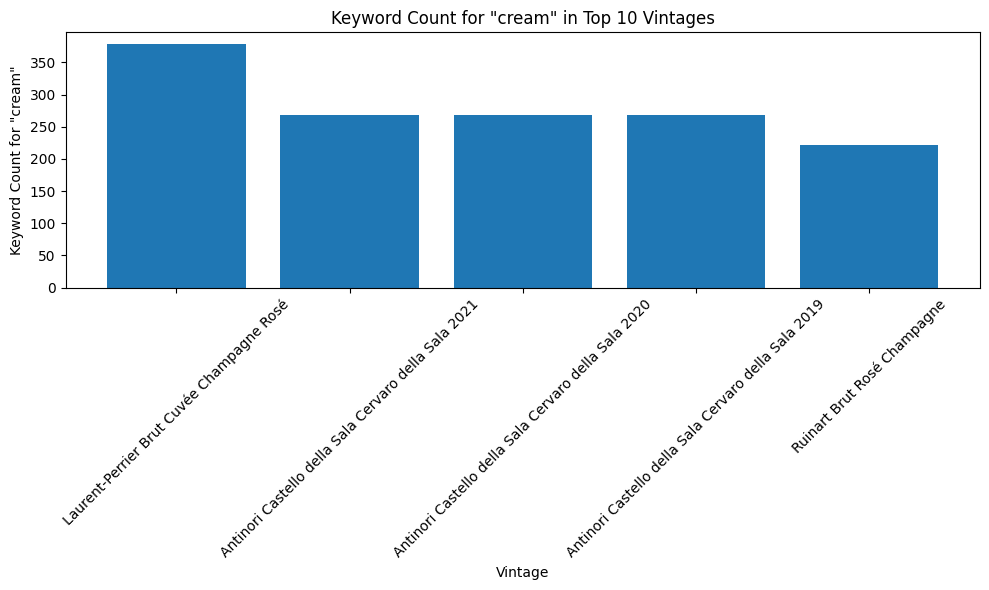

In [54]:
cream = pd_keywords[pd_keywords['keyword'] == 'cream']
display(cream)

cream_top_5 = cream.nlargest(5, 'keyword_count')
display(cream_top_5)

plt.figure(figsize=(10, 6))
plt.bar(cream_top_5['vintages_name'].tolist(), cream_top_5['keyword_count'])
plt.xlabel('Vintage')
plt.ylabel('Keyword Count for "cream"')
plt.title('Keyword Count for "cream" in Top 10 Vintages')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

10 most expensive wines

In [55]:
query2 = """
SELECT 
    vintages.wine_id,
    vintages.name,
    vintages.year,
    vintages.price_euros,
    regions.name,
    grapes.name
    
FROM
    vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN regions ON wines.region_id = regions.id
    JOIN most_used_grapes_per_country ON regions.country_code = most_used_grapes_per_country.country_code
    JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
GROUP BY vintages.name
ORDER BY vintages.price_euros DESC
LIMIT 10
"""

prices = cursor.execute(query2)

pd_prices = pd.DataFrame(prices)
pd_prices.columns =['vintages.wine_id', 'vintages.name', 'vintages.year', 'vintages.price_euros', 'regions.name', 'grapes.name']
display(pd_prices)



,vintages.wine_id,vintages.name,vintages.year,vintages.price_euros,regions.name,grapes.name
0,1451400,Henri Jayer Échézeaux Grand Cru 1976,1976,12886.50,Échezeaux Grand Cru,Chardonnay
1,1435787,Jean-Claude Ramonet Montrachet Grand Cru 1987,1987,11862.50,Montrachet Grand Cru,Chardonnay
2,88177,Domaine Armand Rousseau Chambertin Grand Cru 2002,2002,10960.00,Chambertin Grand Cru,Chardonnay
3,1305714,Maison Leroy Chassagne-Montrachet 1er Cru 'Mor...,1993,10543.75,Chassagne-Montrachet Premier Cru,Chardonnay
4,83920,Domaine de La Romanée-Conti Romanée-Saint-Viva...,1999,10217.50,Romanée-Saint-Vivant Grand Cru,Chardonnay
5,1726273,Domaine Cecile Tremblay Chapelle-Chambertin Gr...,2005,9607.50,Chapelle-Chambertin Grand Cru,Chardonnay
6,1292070,Maison Leroy Nuits-Saint-Georges 1972,1972,9482.50,Nuits-Saint-Georges,Chardonnay
7,1166837,Pétrus Pomerol 1982,1982,9180.00,Pomerol,Chardonnay
8,83920,Domaine de La Romanée-Conti Romanée-Saint-Viva...,2006,8743.75,Romanée-Saint-Vivant Grand Cru,Chardonnay
9,83920,Domaine de La Romanée-Conti Romanée-Saint-Viva...,1993,8463.75,Romanée-Saint-Vivant Grand Cru,Chardonnay


Visualiztion

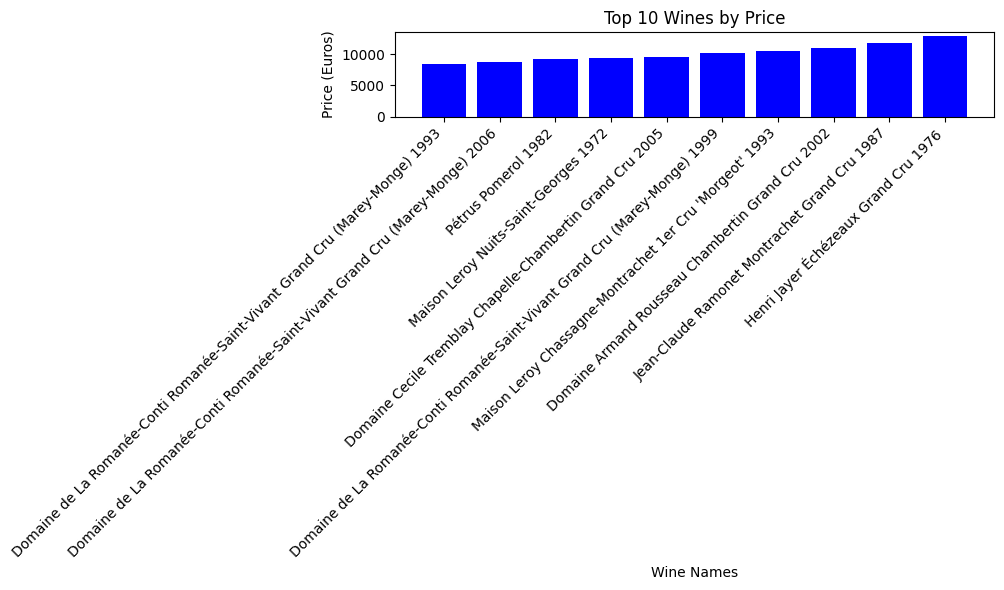

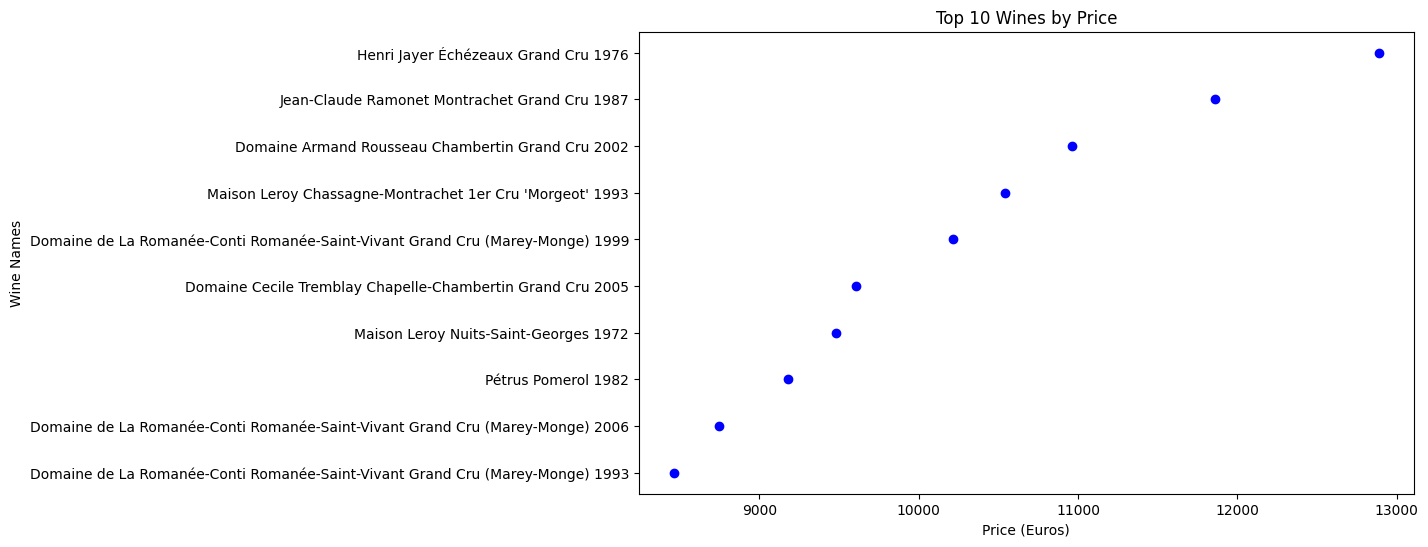

In [56]:



# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(pd_prices['vintages.name'][::-1], pd_prices['vintages.price_euros'][::-1], color='blue')
plt.xlabel('Wine Names')
plt.ylabel('Price (Euros)')
plt.title('Top 10 Wines by Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(pd_prices['vintages.price_euros'][::-1], pd_prices['vintages.name'][::-1], color='blue')
plt.xlabel('Price (Euros)')
plt.ylabel('Wine Names')
plt.title('Top 10 Wines by Price')
plt.show()

10 most old wines

In [57]:
query4 = """
SELECT 
    vintages.wine_id,
    vintages.name,
    vintages.year,
    vintages.price_euros,
    regions.name,
    grapes.name
    
FROM
    vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN regions ON wines.region_id = regions.id
    JOIN most_used_grapes_per_country ON regions.country_code = most_used_grapes_per_country.country_code
    JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
GROUP BY vintages.name
ORDER BY vintages.year
LIMIT 10
"""

old_10 = cursor.execute(query4)

pd_old_10 = pd.DataFrame(old_10)

pd_old_10.columns =['vintages.wine_id', 'vintages.name', 'vintages.year', 'vintages.price_euros', 'regions.name', 'grapes.name']

# Display the resulting DataFrame
display(pd_old_10)

,vintages.wine_id,vintages.name,vintages.year,vintages.price_euros,regions.name,grapes.name
0,2417790,Toro Albalá Ginés Liébana Pedro Ximénez 1910,1910,391.30,Montilla-Moriles,Cabernet Sauvignon
1,2395864,Toro Albalá Don PX Convento Selección 1929,1929,239.60,Montilla-Moriles,Cabernet Sauvignon
2,79262,Château Lynch-Bages Pauillac (Grand Cru Classé...,1934,479.85,Pauillac,Chardonnay
3,2417790,Toro Albalá Ginés Liébana Pedro Ximénez 1937,1937,450.36,Montilla-Moriles,Cabernet Sauvignon
4,16786,Château Climens Barsac (Premier Grand Cru Clas...,1948,1056.25,Barsac,Chardonnay
5,1605285,Château La Mission Haut-Brion Pessac-Léognan (...,1949,2635.55,Pessac-Léognan,Chardonnay
6,82698,Biondi-Santi Brunello di Montalcino Riserva 1955,1955,1970.05,Brunello di Montalcino,Chardonnay
7,2395864,Toro Albalá Don PX Convento Selección 1955,1955,198.40,Montilla-Moriles,Cabernet Sauvignon
8,1558589,Biondi-Santi Brunello di Montalcino 1958,1958,747.50,Brunello di Montalcino,Chardonnay
9,82698,Biondi-Santi Brunello di Montalcino Riserva 1958,1958,1046.25,Brunello di Montalcino,Chardonnay


Visualiztion 10 most old wines

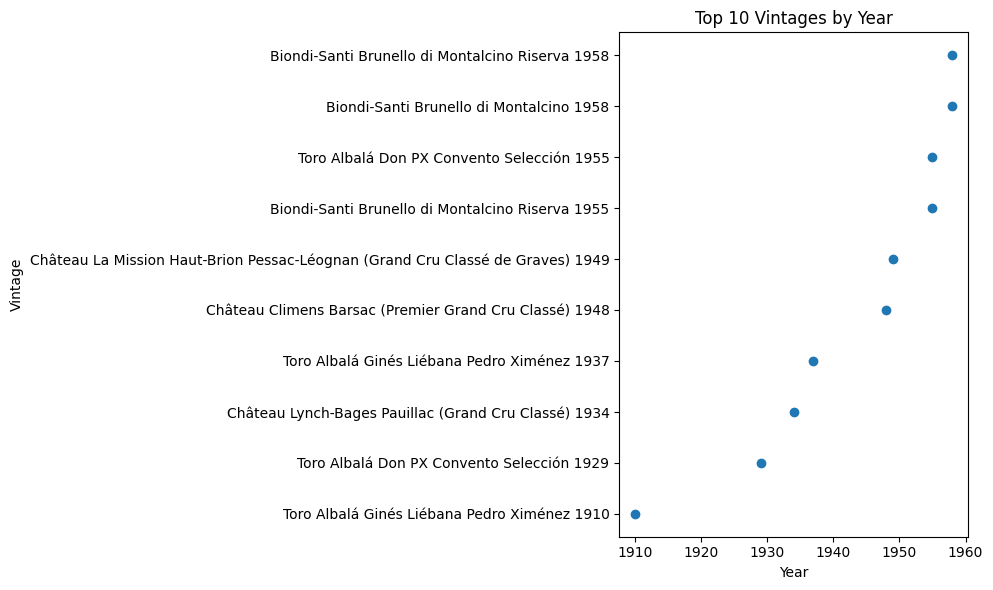

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(pd_old_10['vintages.year'], pd_old_10['vintages.name'])
plt.xlabel('Year')
plt.ylabel('Vintage')
plt.title('Top 10 Vintages by Year')
plt.tight_layout()
plt.show()

All wines sorted by year

In [59]:
query3 = """
SELECT 
    vintages.wine_id,
    vintages.name,
    vintages.year,
    vintages.price_euros,
    regions.name,
    grapes.name
    
FROM
    vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN regions ON wines.region_id = regions.id
    JOIN most_used_grapes_per_country ON regions.country_code = most_used_grapes_per_country.country_code
    JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
GROUP BY vintages.name
ORDER BY vintages.year
"""

old = cursor.execute(query3)

pd_old = pd.DataFrame(old)

pd_old.columns =['vintages.wine_id', 'vintages.name', 'vintages.year', 'vintages.price_euros', 'regions.name', 'grapes.name']

drop_indices = pd_old[pd_old['vintages.year'] == 'N.V.'].index

# Drop rows with 'N.V.' in 'vintages.price_euros'
pd_old.drop(drop_indices, inplace=True)

# Display the resulting DataFrame
display(pd_old)

,vintages.wine_id,vintages.name,vintages.year,vintages.price_euros,regions.name,grapes.name
0,2417790,Toro Albalá Ginés Liébana Pedro Ximénez 1910,1910,391.300000,Montilla-Moriles,Cabernet Sauvignon
1,2395864,Toro Albalá Don PX Convento Selección 1929,1929,239.600000,Montilla-Moriles,Cabernet Sauvignon
2,79262,Château Lynch-Bages Pauillac (Grand Cru Classé...,1934,479.850000,Pauillac,Chardonnay
3,2417790,Toro Albalá Ginés Liébana Pedro Ximénez 1937,1937,450.360000,Montilla-Moriles,Cabernet Sauvignon
4,16786,Château Climens Barsac (Premier Grand Cru Clas...,1948,1056.250000,Barsac,Chardonnay
...,...,...,...,...,...,...
2019,9348311,Puglia Pop Luminaria Primitivo di Manduria 2021,2021,24.950000,Primitivo di Manduria,Chardonnay
2020,1211299,Quintodecimo Giallo d'Arles Greco di Tufo 2021,2021,47.850000,Greco di Tufo,Chardonnay
2021,10773117,Varvaglione Paralupi Appassimento 2021,2021,13.880000,Puglia,Chardonnay
2022,5294192,Nic Tartaglia Trebbiano d'Abruzzo 2022,2022,13.333333,Trebbiano d'Abruzzo,Chardonnay


Scatter plot year and price

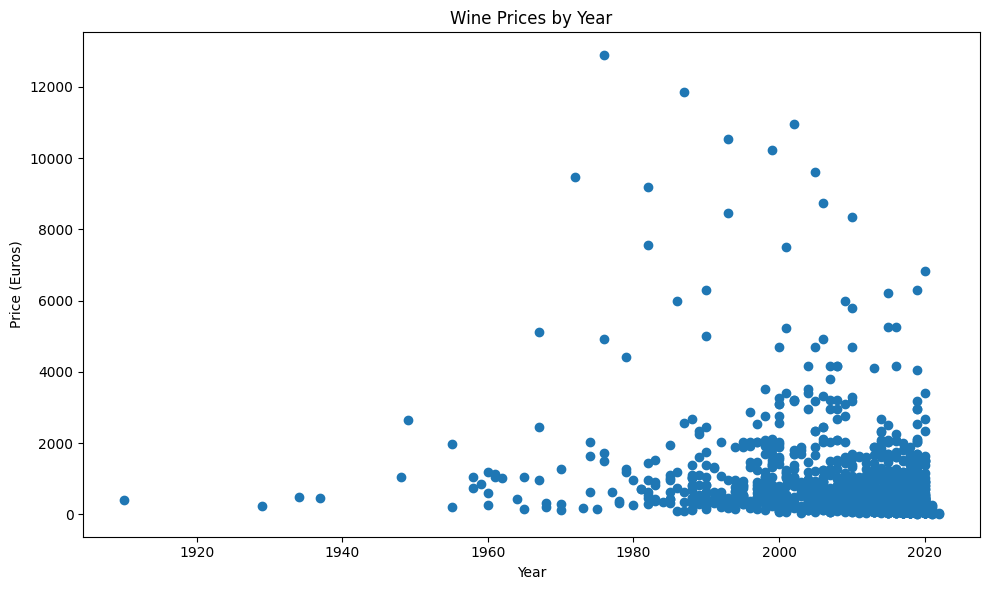

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(pd_old['vintages.year'], pd_old['vintages.price_euros'])
plt.xlabel('Year')
plt.ylabel('Price (Euros)')
plt.title('Wine Prices by Year')
plt.tight_layout()
plt.show()